In [1]:
import os
import shutil
import random
import cv2
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

## Hàm giảm dung lượng ảnh bằng OpenCV

In [ ]:
def compress_image_opencv(input_path, output_path=None, quality=85, max_size=(1024, 1024)):
    """
    Giảm dung lượng ảnh bằng cách resize và điều chỉnh chất lượng JPEG sử dụng OpenCV.

    Args:
        input_path (str): Đường dẫn ảnh gốc.
        output_path (str): Đường dẫn ảnh đã nén. Nếu None thì ghi đè ảnh gốc.
        quality (int): Chất lượng ảnh (0–100), càng thấp thì ảnh càng nhỏ.
        max_size (tuple): Kích thước tối đa (width, height).

    Returns:
        str: Đường dẫn ảnh đã lưu.
    """
    # Đọc ảnh
    img = cv2.imread(input_path)

    # Resize nếu lớn hơn kích thước cho phép
    height, width = img.shape[:2]
    max_w, max_h = max_size
    scale = min(max_w / width, max_h / height, 1.0)  # chỉ thu nhỏ, không phóng to

    if scale < 1.0:
        new_size = (int(width * scale), int(height * scale))
        img = cv2.resize(img, new_size, interpolation=cv2.INTER_AREA)

    # Thiết lập đường dẫn lưu
    if output_path is None:
        output_path = input_path

    # Lưu ảnh JPEG với chất lượng mong muốn
    cv2.imwrite(output_path, img, [cv2.IMWRITE_JPEG_QUALITY, quality])

    return output_path

if __name__ == '__main__':
    compressed = compress_image_opencv(
        input_path="input.jpg",
        output_path="compressed.jpg",
        quality=70,
        max_size=(800, 800)
    )

    print("Ảnh đã nén:", compressed)

## Hàm nén tất cả ảnh trong thư mục

In [2]:
def compress_images_in_folder(input_folder, output_folder=None, quality=80, max_size=(1024, 1024), extensions={'.jpg', '.jpeg', '.png', '.bmp'}):
    """
    Nén tất cả ảnh trong một thư mục bằng cách resize và giảm chất lượng JPEG.

    Args:
        input_folder (str): Đường dẫn thư mục chứa ảnh gốc.
        output_folder (str): Thư mục lưu ảnh đã nén. Nếu None, ghi đè lên ảnh gốc.
        quality (int): Chất lượng ảnh (0–100).
        max_size (tuple): Kích thước tối đa (width, height).
        extensions (set): Tập hợp phần mở rộng ảnh cần xử lý.

    Returns:
        list: Danh sách đường dẫn ảnh đã nén.
    """
    if output_folder is None:
        output_folder = input_folder
    else:
        os.makedirs(output_folder, exist_ok=True)

    compressed_files = []

    for filename in os.listdir(input_folder):
        name, ext = os.path.splitext(filename)
        if ext.lower() not in extensions:
            continue

        input_path = os.path.join(input_folder, filename)
        output_path = os.path.join(output_folder, filename)

        img = cv2.imread(input_path)
        if img is None:
            print(f"Không đọc được ảnh: {input_path}")
            continue

        h, w = img.shape[:2]
        max_w, max_h = max_size
        scale = min(max_w / w, max_h / h, 1.0)

        if scale < 1.0:
            new_size = (int(w * scale), int(h * scale))
            img = cv2.resize(img, new_size, interpolation=cv2.INTER_AREA)

        # Lưu lại ảnh nén (JPEG/PNG tùy phần mở rộng)
        if ext.lower() in {'.jpg', '.jpeg'}:
            cv2.imwrite(output_path, img, [cv2.IMWRITE_JPEG_QUALITY, quality])
        elif ext.lower() == '.png':
            # PNG quality (0 = best compression, 9 = worst compression)
            cv2.imwrite(output_path, img, [cv2.IMWRITE_PNG_COMPRESSION, 3])

        compressed_files.append(output_path)

    return compressed_files

if __name__ == '__main__':
    compressed = compress_images_in_folder(
        input_folder=r"C:\Users\DTC\Desktop\anh mmu\Black",
        output_folder=r"C:\Users\DTC\Desktop\anh mmu\Black_resize",
        quality=70,
        max_size=(800, 800)
    )

    print("Ảnh đã nén:", compressed)


Ảnh đã nén: ['C:\\Users\\DTC\\Desktop\\anh mmu\\Black_resize\\Image_20250603101339020.bmp', 'C:\\Users\\DTC\\Desktop\\anh mmu\\Black_resize\\Image_20250603101341667.bmp', 'C:\\Users\\DTC\\Desktop\\anh mmu\\Black_resize\\Image_20250603101345899.bmp', 'C:\\Users\\DTC\\Desktop\\anh mmu\\Black_resize\\Image_20250603101348204.bmp', 'C:\\Users\\DTC\\Desktop\\anh mmu\\Black_resize\\Image_20250603101350843.bmp', 'C:\\Users\\DTC\\Desktop\\anh mmu\\Black_resize\\Image_20250603101353627.bmp', 'C:\\Users\\DTC\\Desktop\\anh mmu\\Black_resize\\Image_20250603101356226.bmp', 'C:\\Users\\DTC\\Desktop\\anh mmu\\Black_resize\\Image_20250603101359163.bmp', 'C:\\Users\\DTC\\Desktop\\anh mmu\\Black_resize\\Image_20250603101402827.bmp', 'C:\\Users\\DTC\\Desktop\\anh mmu\\Black_resize\\Image_20250603101406403.bmp', 'C:\\Users\\DTC\\Desktop\\anh mmu\\Black_resize\\Image_20250603101409274.bmp', 'C:\\Users\\DTC\\Desktop\\anh mmu\\Black_resize\\Image_20250603101436651.bmp', 'C:\\Users\\DTC\\Desktop\\anh mmu\\Blac

## Hàm đổi đuôi ảnh hàng loạt bằng OpenCV

In [2]:
def convert_image_format(input_folder, output_folder, input_ext=".png", output_ext=".jpg"):
    # Tạo thư mục đầu ra nếu chưa tồn tại
    os.makedirs(output_folder, exist_ok=True)

    count = 0
    for filename in os.listdir(input_folder):
        if filename.lower().endswith(input_ext.lower()):
            old_path = os.path.join(input_folder, filename)
            img = cv2.imread(old_path)

            if img is None:
                print(f"⚠️ Không đọc được ảnh: {filename}")
                continue

            base_name = os.path.splitext(filename)[0]
            new_filename = base_name + output_ext
            new_path = os.path.join(output_folder, new_filename)

            success = cv2.imwrite(new_path, img)
            if success:
                print(f"✅ {filename} -> {new_filename}")
                count += 1
            else:
                print(f"❌ Lỗi khi lưu ảnh: {new_filename}")

    print(f"\n🎉 Hoàn tất! Đã lưu {count} ảnh tại: {output_folder}")
    
convert_image_format(
    input_folder=r"C:\Users\DTC\Desktop\ImageMainNew\Images",
    output_folder=r"C:\Users\DTC\Desktop\ImageMainNew\ImagesResize",
    input_ext=".bmp",
    output_ext=".jpg"
)

✅ Image__2025-06-18__09-25-49.bmp -> Image__2025-06-18__09-25-49.jpg
✅ Image__2025-06-18__09-26-53.bmp -> Image__2025-06-18__09-26-53.jpg
✅ Image__2025-06-18__09-27-08.bmp -> Image__2025-06-18__09-27-08.jpg
✅ Image__2025-06-18__09-27-17.bmp -> Image__2025-06-18__09-27-17.jpg
✅ Image__2025-06-18__09-27-23.bmp -> Image__2025-06-18__09-27-23.jpg
✅ Image__2025-06-18__09-27-33.bmp -> Image__2025-06-18__09-27-33.jpg
✅ Image__2025-06-18__09-28-00.bmp -> Image__2025-06-18__09-28-00.jpg
✅ Image__2025-06-18__09-28-20.bmp -> Image__2025-06-18__09-28-20.jpg
✅ Image__2025-06-18__09-28-35.bmp -> Image__2025-06-18__09-28-35.jpg
✅ Image__2025-06-18__09-28-44.bmp -> Image__2025-06-18__09-28-44.jpg
✅ Image__2025-06-18__09-28-52.bmp -> Image__2025-06-18__09-28-52.jpg
✅ Image__2025-06-18__09-29-01.bmp -> Image__2025-06-18__09-29-01.jpg
✅ Image__2025-06-18__09-29-16.bmp -> Image__2025-06-18__09-29-16.jpg
✅ Image__2025-06-18__09-29-39.bmp -> Image__2025-06-18__09-29-39.jpg
✅ Image__2025-06-18__09-29-57.bmp 

horizontal: Nằm ngang
vertical: Nằm dọc
width: chiều dài(ngang)
height: chiều cao(dọc)

### Cắt ảnh theo tỉ lệ phần trăm

In [24]:
def crop_image_percent(image_path, h_range=(0, 95), v_range=(0, 75)):
    image = cv2.imread(image_path)
    h, w = image.shape[:2]
    start_x, end_x = int(w * h_range[0] / 100), int(w * h_range[1] / 100)
    start_y, end_y = int(h * v_range[0] / 100), int(h * v_range[1] / 100)
    
    start_x, end_x = max(0, start_x), min(w, end_x)
    start_y, end_y = max(0, start_y), min(h, end_y)
    
    cropped_img = image[start_y:end_y, start_x:end_x]
    return cropped_img
# image_path = r'C:\Users\DTC\Desktop\PBA\Data\Data_Raw\Ngang\S51UC21375_SMM-BGBA4001VI_True_10-20-18_0_1.jpg'
# cropped_img = crop_image_percent(image_path)
# plt.imshow(cropped_img)
# plt.show()

### Resize ảnh

In [2]:
def resize_image(image_path, size_image=640):
    image = cv2.imread(image_path)
    image_resize = cv2.resize(image, (size_image, size_image))
    return image_resize
# image_path = r'C:\Users\DTC\Desktop\PBA\Data\Data_Raw\Ngang\S51V209393_SFG-ADU070CBL1_True_02-59-29_0_1.jpg'
# cropped_img = resize_image(image_path)
# plt.imshow(cropped_img)
# plt.show()

In [4]:
def resize_image(image_path, size_image=640):
    # Đọc ảnh gốc
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Không thể đọc ảnh từ đường dẫn: {image_path}")
    
    h, w = img.shape[:2]
    # Tìm chiều lớn nhất
    max_dim = max(h, w)

    # Tính toán padding
    top = (max_dim - h) // 2
    bottom = max_dim - h - top
    left = (max_dim - w) // 2
    right = max_dim - w - left

    # Thêm viền đen để ảnh thành hình vuông
    padded = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=[0, 0, 0])

    # Resize ảnh về kích thước chuẩn
    resized = cv2.resize(padded, (size_image, size_image), interpolation=cv2.INTER_LANCZOS4)

    return resized

### Cắt ảnh hoặc resize theo path, sử dụng hàm crop_image_percent và resize_image

In [25]:
def crop_image_path(source_dir, resize_dir, crop_percent=False):
    os.makedirs(resize_dir, exist_ok=True)
    image_files = sorted(os.listdir(source_dir))
    for file in image_files:
        source_path = os.path.join(source_dir, file)
        if crop_percent == True:
            cropped_img = crop_image_percent(source_path)
        else:
            cropped_img = resize_image(source_path)
        output_path = os.path.join(resize_dir, file)
        cv2.imwrite(output_path, cropped_img)
        print(f"Ảnh đã được lưu tại {output_path}")

# crop_image_path(r'C:\Users\DTC\Desktop\PBA\Data\Data_Raw\Ngang', r'C:\Users\DTC\Desktop\PBA\Data\Ngang_resize', True)
crop_image_path(r'C:\Users\DTC\Desktop\BasicUI\Preprocessing\ImageChangetoRaw', r'C:\Users\DTC\Desktop\BasicUI\Preprocessing\ImageCrop', True)
        

Ảnh đã được lưu tại C:\Users\DTC\Desktop\BasicUI\Preprocessing\ImageCrop\Image_20240215014410305.bmp
Ảnh đã được lưu tại C:\Users\DTC\Desktop\BasicUI\Preprocessing\ImageCrop\Image_20240215014415967.bmp
Ảnh đã được lưu tại C:\Users\DTC\Desktop\BasicUI\Preprocessing\ImageCrop\Image_20240215014418475.bmp
Ảnh đã được lưu tại C:\Users\DTC\Desktop\BasicUI\Preprocessing\ImageCrop\Image_20240215014420955.bmp
Ảnh đã được lưu tại C:\Users\DTC\Desktop\BasicUI\Preprocessing\ImageCrop\Image_20240215014424093.bmp
Ảnh đã được lưu tại C:\Users\DTC\Desktop\BasicUI\Preprocessing\ImageCrop\Image_20240215014426650.bmp
Ảnh đã được lưu tại C:\Users\DTC\Desktop\BasicUI\Preprocessing\ImageCrop\Image_20240215014529744.bmp
Ảnh đã được lưu tại C:\Users\DTC\Desktop\BasicUI\Preprocessing\ImageCrop\Image_20240215014532503.bmp
Ảnh đã được lưu tại C:\Users\DTC\Desktop\BasicUI\Preprocessing\ImageCrop\Image_20240215014535711.bmp
Ảnh đã được lưu tại C:\Users\DTC\Desktop\BasicUI\Preprocessing\ImageCrop\Image_202402150145

### Chia tập datasets theo thứ tự chẵn lẻ vào hai tệp

In [82]:
def split_dataset(source_dir, even_dir, odd_dir):
    os.makedirs(even_dir, exist_ok=True)
    os.makedirs(odd_dir, exist_ok=True)
    
    image_files = sorted(os.listdir(source_dir))
    
    for i, file in enumerate(image_files):
        src_path = os.path.join(source_dir, file)
        dst_path = os.path.join(even_dir if i % 2 == 0 else odd_dir, file)
        shutil.copy(src_path, dst_path)

#split_dataset(r'C:\Users\DTC\Desktop\PBA\Data\Data_Raw\PBA_picture_2\SLS-BR06F0EBVL', r'C:\Users\DTC\Desktop\PBA\Data\Data_Raw\Doc', r'C:\Users\DTC\Desktop\PBA\Data\Data_Raw\Ngang')

### Chia dữ liệu thành 3 tệp train, val, test theo tỷ lệ phần trăm

In [3]:
import os
import shutil
import random

def split_train_val_test(source_dir, **kwargs):
    train_dir = kwargs['train_dir']
    val_dir = kwargs['val_dir']
    test_dir = kwargs['test_dir']
    train_split = kwargs['train_split']
    val_split = kwargs['val_split']

    # Create directories
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(val_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)
    
    # Get list of files (only files, not directories)
    image_files = [f for f in os.listdir(source_dir) 
                   if os.path.isfile(os.path.join(source_dir, f))]
    
    # Set seed before shuffling for reproducibility
    random.seed(42)
    random.shuffle(image_files)
    
    quantity_files = len(image_files)
    quantity_files_train = int(quantity_files * train_split)
    quantity_files_val = int(quantity_files * val_split)
    
    print(f"Total files: {quantity_files}")
    print(f"Train: {quantity_files_train}, Val: {quantity_files_val}, Test: {quantity_files - quantity_files_train - quantity_files_val}")
    
    for i, file in enumerate(image_files):
        src_path = os.path.join(source_dir, file)
        
        if i < quantity_files_train:
            # Training set
            dst_path = os.path.join(train_dir, file)  # Include filename in destination
            shutil.copy(src_path, dst_path)
        elif i < quantity_files_train + quantity_files_val:
            # Validation set
            dst_path = os.path.join(val_dir, file)    # Include filename in destination
            shutil.copy(src_path, dst_path)
        else:
            # Test set
            dst_path = os.path.join(test_dir, file)   # Include filename in destination
            shutil.copy(src_path, dst_path)

# Usage example
split_train_val_test(source_dir=r'C:\Users\DTC\Desktop\ImageCropBud3FE\ImageMicFPCP\All', 
                     train_dir=r'C:\Users\DTC\Desktop\ImageCropBud3FE\ImageMicFPCP\All\train', 
                     val_dir=r'C:\Users\DTC\Desktop\ImageCropBud3FE\ImageMicFPCP\All\val', 
                     test_dir=r'C:\Users\DTC\Desktop\ImageCropBud3FE\ImageMicFPCP\All\test', 
                     train_split=0.75, val_split=0)

Total files: 2086
Train: 1564, Val: 0, Test: 522


### Show hình ảnh của một batch (mặc định 16 ảnh)

In [ ]:
def show_batch_images(batch_dataloader, class_names, num_rows=4, num_cols=4):
    images, labels = next(iter(batch_dataloader))
    _, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 1.5, num_rows * 1.5))
    axes = axes.flatten()
    for i in range(num_rows * num_cols):
        if i >= len(images):
            break
        img = images[i].permute(1, 2, 0)
        img = img.numpy()
        axes[i].imshow(img)
        axes[i].set_title(class_names[labels[i].item()], fontsize=10)
        axes[i].axis("off")
    plt.tight_layout()
    plt.show()

### Hiển thị 16 ảnh ngẫu nhiên của tệp

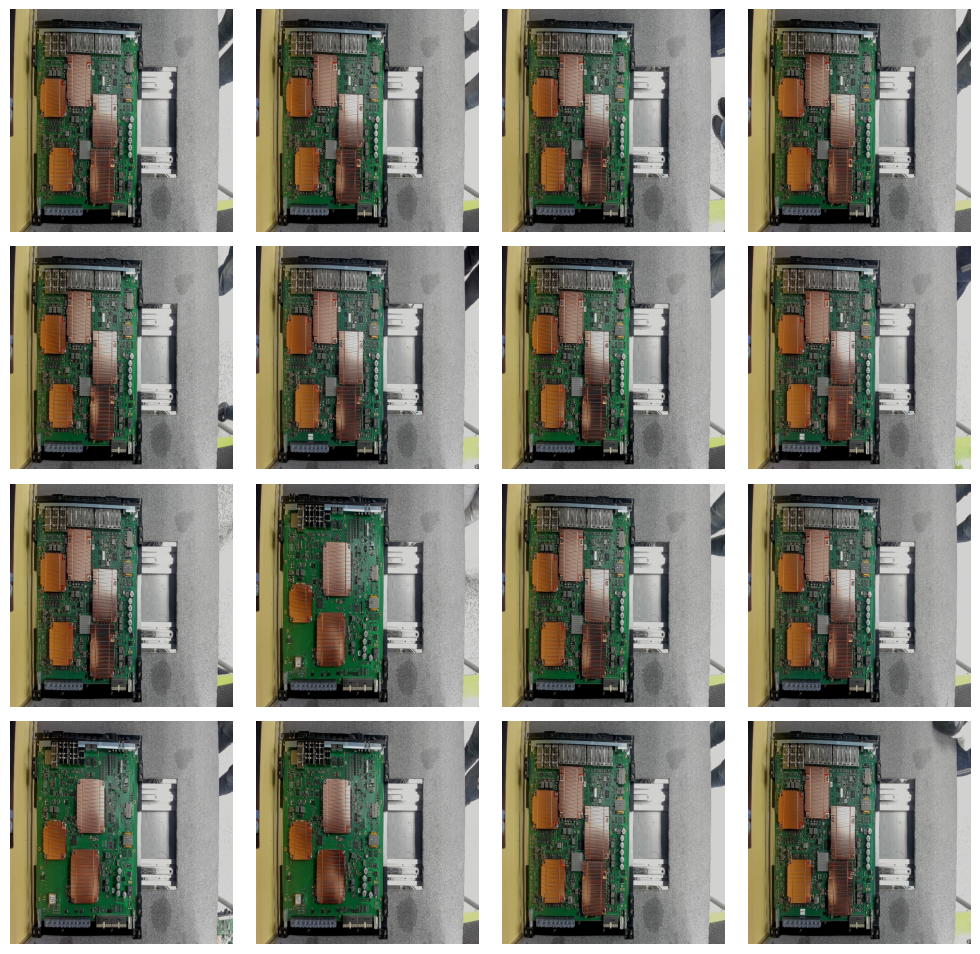

In [ ]:
def show_random_images(folder_path, num_images=16):
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('png', 'jpg', 'jpeg'))]
    
    if len(image_files) == 0:
        print("Thư mục không chứa ảnh nào!")
        return
    if len(image_files) < num_images:
        print(f"Chỉ có {len(image_files)} ảnh trong thư mục, hiển thị tất cả.")
        num_images = len(image_files)
        
    selected_images = random.sample(image_files, num_images)

    fig, axes = plt.subplots(4, 4, figsize=(10, 10))

    for ax, img_name in zip(axes.flatten(), selected_images):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        ax.imshow(img)
        ax.axis("off")

    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.show()
    
# show_random_images(r"C:\Users\DTC\Desktop\PBA\Data\Doc_resize")


## Duyệt qua toàn bộ cây thư mục trong một thư mục gốc, tìm tất cả các ảnh và sao chép chúng vào một thư mục đích

In [2]:
def is_image(file_path):
    """Kiểm tra xem file có phải là ảnh không dựa vào phần mở rộng."""
    image_extensions = {'.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.webp'}
    return file_path.suffix.lower() in image_extensions

def copy_images_recursive(source_folder, destination_folder):
    """Duyệt qua toàn bộ cây thư mục và sao chép ảnh vào thư mục đích."""
    source_folder = Path(source_folder)
    destination_folder = Path(destination_folder)
    destination_folder.mkdir(parents=True, exist_ok=True)
    
    for root, _, files in os.walk(source_folder):
        for file in files:
            file_path = Path(root) / file
            if is_image(file_path):
                dest_path = destination_folder / file_path.name
                
                # Tránh ghi đè file trùng tên
                counter = 1
                while dest_path.exists():
                    dest_path = destination_folder / f"{file_path.stem}_{counter}{file_path.suffix}"
                    counter += 1
                
                shutil.copy2(file_path, dest_path)
                print(f"Đã sao chép: {file_path} -> {dest_path}")

# Sử dụng chương trình
source_dir = r"C:\Users\DTC\Desktop\ImageCropBud3FE\ImageMicFPCP"  # Thay bằng đường dẫn thư mục nguồn
destination_dir = r"C:\Users\DTC\Desktop\ImageCropBud3FE\ImageMicFPCP\All"  # Thay bằng đường dẫn thư mục đích
copy_images_recursive(source_dir, destination_dir)

Đã sao chép: C:\Users\DTC\Desktop\ImageCropBud3FE\ImageMicFPCP\250609\250609_110735_1.jpg -> C:\Users\DTC\Desktop\ImageCropBud3FE\ImageMicFPCP\All\250609_110735_1.jpg
Đã sao chép: C:\Users\DTC\Desktop\ImageCropBud3FE\ImageMicFPCP\250609\250609_110744_2.jpg -> C:\Users\DTC\Desktop\ImageCropBud3FE\ImageMicFPCP\All\250609_110744_2.jpg
Đã sao chép: C:\Users\DTC\Desktop\ImageCropBud3FE\ImageMicFPCP\250609\250609_110752_3.jpg -> C:\Users\DTC\Desktop\ImageCropBud3FE\ImageMicFPCP\All\250609_110752_3.jpg
Đã sao chép: C:\Users\DTC\Desktop\ImageCropBud3FE\ImageMicFPCP\250609\250609_110800_4.jpg -> C:\Users\DTC\Desktop\ImageCropBud3FE\ImageMicFPCP\All\250609_110800_4.jpg
Đã sao chép: C:\Users\DTC\Desktop\ImageCropBud3FE\ImageMicFPCP\250609\250609_110822_1.jpg -> C:\Users\DTC\Desktop\ImageCropBud3FE\ImageMicFPCP\All\250609_110822_1.jpg
Đã sao chép: C:\Users\DTC\Desktop\ImageCropBud3FE\ImageMicFPCP\250609\250609_110832_2.jpg -> C:\Users\DTC\Desktop\ImageCropBud3FE\ImageMicFPCP\All\250609_110832_2.jp

## Tăng cường dữ liệu ảnh

In [11]:
import os
import cv2
import numpy as np
from PIL import Image, ImageEnhance, ImageFilter
import random
from pathlib import Path

def augment_images_from_folder(input_folder, output_folder, num_augmentations=7):
    """
    Tạo thêm ảnh mới từ folder ảnh gốc sử dụng các phép biến đổi nhẹ
    
    Args:
        input_folder (str): Đường dẫn đến folder chứa ảnh gốc
        output_folder (str): Đường dẫn đến folder lưu ảnh đã biến đổi
        num_augmentations (int): Số lượng ảnh biến đổi tạo ra từ mỗi ảnh gốc
    """
    
    # Tạo output folder nếu chưa tồn tại
    Path(output_folder).mkdir(parents=True, exist_ok=True)
    
    # Các định dạng ảnh được hỗ trợ
    supported_formats = ('.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.tif')
    
    # Lấy danh sách tất cả file ảnh trong folder
    image_files = [f for f in os.listdir(input_folder) 
                   if f.lower().endswith(supported_formats)]
    
    print(f"Tìm thấy {len(image_files)} ảnh trong folder {input_folder}")
    
    for idx, image_file in enumerate(image_files):
        input_path = os.path.join(input_folder, image_file)
        base_name = os.path.splitext(image_file)[0]
        
        # Đọc ảnh
        image = cv2.imread(input_path)
        if image is None:
            print(f"Không thể đọc ảnh: {image_file}")
            continue
            
        print(f"Đang xử lý ({idx+1}/{len(image_files)}): {image_file}")
        
        # Tạo các ảnh biến đổi
        for i in range(num_augmentations):
            # Chọn ngẫu nhiên các phép biến đổi nhẹ
            augmented_image = apply_gentle_augmentation(image.copy())
            
            # Lưu ảnh
            output_filename = f"{base_name}_aug_{i+1}.jpg"
            output_path = os.path.join(output_folder, output_filename)
            cv2.imwrite(output_path, augmented_image)
    
    print(f"Hoàn thành! Đã tạo {len(image_files) * num_augmentations} ảnh mới trong {output_folder}")

def apply_gentle_augmentation(image):
    """
    Áp dụng ngẫu nhiên các phép biến đổi nhẹ lên ảnh
    
    Args:
        image: Ảnh đầu vào (OpenCV format)
    
    Returns:
        Ảnh đã được biến đổi nhẹ
    """
    
    # Chuyển đổi từ BGR (OpenCV) sang RGB (PIL)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    pil_image = Image.fromarray(image_rgb)
    
    # Danh sách các phép biến đổi nhẹ
    transformations = [
        apply_rotation,             # Xoay nhẹ
        apply_gentle_brightness,    # Thay đổi độ sáng nhẹ
        apply_gentle_contrast,      # Thay đổi độ tương phản nhẹ
        apply_slight_blur,          # Làm mờ rất nhẹ
        apply_light_noise,          # Thêm nhiễu nhẹ 
        apply_horizontal_flip,      # Lật ngang
        apply_gentle_zoom,          # Thu phóng nhẹ
        apply_slight_translation,   # Di chuyển nhẹ
        apply_gentle_shear,         # Biến dạng nhẹ
        apply_hue_shift,            # Thay đổi hue
        apply_saturation_change,    # Thay đổi độ bão hòa
        apply_grayscale_blend,      # Pha trộn grayscale
        apply_exposure_change,      # Thay đổi exposure
        apply_color_transition      # Chuyển đổi màu sắc
    ]
    
    # Chỉ chọn 1-2 phép biến đổi để không thay đổi quá nhiều
    num_transforms = random.randint(1, 2)
    selected_transforms = random.sample(transformations, num_transforms)
    
    # Áp dụng các phép biến đổi
    result_image = pil_image
    for transform in selected_transforms:
        result_image = transform(result_image)
    
    # Chuyển đổi lại về OpenCV format
    result_array = np.array(result_image)
    result_bgr = cv2.cvtColor(result_array, cv2.COLOR_RGB2BGR)
    
    return result_bgr

def apply_gentle_brightness(image):
    """Thay đổi độ sáng rất nhẹ"""
    factor = random.uniform(0.9, 1.1)  # Chỉ thay đổi ±10%
    enhancer = ImageEnhance.Brightness(image)
    return enhancer.enhance(factor)

def apply_gentle_contrast(image):
    """Thay đổi độ tương phản rất nhẹ"""
    factor = random.uniform(0.95, 1.05)  # Chỉ thay đổi ±5%
    enhancer = ImageEnhance.Contrast(image)
    return enhancer.enhance(factor)

def apply_slight_blur(image):
    """Áp dụng hiệu ứng mờ rất nhẹ - 100% cơ hội"""
    return image.filter(ImageFilter.GaussianBlur(radius=random.uniform(0.1, 0.5)))

def apply_light_noise(image):
    """Thêm nhiễu rất rất nhẹ vào ảnh - 100% cơ hội"""
    img_array = np.array(image)
    noise = np.random.normal(0, 0.5, img_array.shape).astype(np.uint8)  # Giảm từ 1 xuống 0.5
    noisy_image = np.clip(img_array.astype(np.int16) + noise, 0, 255).astype(np.uint8)
    return Image.fromarray(noisy_image)

def apply_horizontal_flip(image):
    """Lật ảnh theo chiều ngang - 100% cơ hội"""
    return image.transpose(Image.FLIP_LEFT_RIGHT)

def apply_gentle_zoom(image):
    """Thu phóng rất nhẹ - 100% cơ hội, không có viền trắng"""
    zoom_factor = random.uniform(0.90, 1.1)
    width, height = image.size
    
    # Chuyển sang OpenCV để zoom không có viền trắng
    img_array = np.array(image)
    
    if zoom_factor > 1:
        # Zoom in - crop từ trung tâm
        new_width = int(width / zoom_factor)
        new_height = int(height / zoom_factor)
        
        # Tính toán vùng crop từ trung tâm
        left = (width - new_width) // 2
        top = (height - new_height) // 2
        
        # Crop và resize về kích thước gốc
        cropped = img_array[top:top+new_height, left:left+new_width]
        zoomed = cv2.resize(cropped, (width, height), interpolation=cv2.INTER_LINEAR)
    else:
        # Zoom out - resize và crop để loại bỏ viền
        temp_width = int(width * zoom_factor)
        temp_height = int(height * zoom_factor)
        
        # Resize nhỏ hơn
        resized = cv2.resize(img_array, (temp_width, temp_height), interpolation=cv2.INTER_LINEAR)
        
        # Pad bằng cách lặp lại pixel biên thay vì dùng màu trắng
        pad_x = (width - temp_width) // 2
        pad_y = (height - temp_height) // 2
        
        zoomed = cv2.copyMakeBorder(resized, pad_y, width-temp_width-pad_y, 
                                   pad_x, height-temp_height-pad_x, 
                                   cv2.BORDER_REFLECT_101)
    
    return Image.fromarray(zoomed)

def apply_slight_translation(image):
    """Di chuyển ảnh rất nhẹ - 100% cơ hội, không có viền trắng"""
    width, height = image.size
    dx = random.randint(-int(width*0.02), int(width*0.02))
    dy = random.randint(-int(height*0.02), int(height*0.02))
    
    # Chuyển sang OpenCV để translation không có viền trắng
    img_array = np.array(image)
    
    # Tạo ma trận translation
    translation_matrix = np.float32([[1, 0, dx], [0, 1, dy]])
    
    # Áp dụng translation với border reflection
    translated = cv2.warpAffine(img_array, translation_matrix, (width, height), 
                               flags=cv2.INTER_LINEAR, 
                               borderMode=cv2.BORDER_REFLECT_101)
    
    return Image.fromarray(translated)

def apply_gentle_shear(image):
    """Biến dạng nhẹ (shear) - 100% cơ hội, không có viền trắng"""
    width, height = image.size
    
    # Tạo shear factor rất nhẹ
    shear_x = random.uniform(-0.05, 0.05)  # Shear theo trục X
    shear_y = random.uniform(-0.05, 0.05)  # Shear theo trục Y
    
    # Chuyển sang OpenCV
    img_array = np.array(image)
    
    # Tạo ma trận shear
    shear_matrix = np.float32([[1, shear_x, 0], 
                              [shear_y, 1, 0]])
    
    # Áp dụng shear với border reflection
    sheared = cv2.warpAffine(img_array, shear_matrix, (width, height), 
                            flags=cv2.INTER_LINEAR, 
                            borderMode=cv2.BORDER_REFLECT_101)
    
    return Image.fromarray(sheared)

def apply_hue_shift(image):
    """Thay đổi hue (màu sắc) nhẹ - 100% cơ hội"""
    # Chuyển sang OpenCV để xử lý HSV
    img_array = np.array(image)
    hsv = cv2.cvtColor(img_array, cv2.COLOR_RGB2HSV)
    
    # Thay đổi hue nhẹ (±10 độ trên thang 180)
    hue_shift = random.randint(-10, 10)
    hsv[:, :, 0] = (hsv[:, :, 0].astype(np.int16) + hue_shift) % 180
    
    # Chuyển về RGB
    rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
    return Image.fromarray(rgb)

def apply_saturation_change(image):
    """Thay đổi độ bão hòa màu nhẹ - 100% cơ hội"""
    factor = random.uniform(0.8, 1.2)  # ±20% saturation
    enhancer = ImageEnhance.Color(image)
    return enhancer.enhance(factor)

def apply_grayscale_blend(image):
    """Pha trộn với grayscale nhẹ - 100% cơ hội"""
    # Tạo phiên bản grayscale
    grayscale = image.convert('L').convert('RGB')
    
    # Pha trộn với ảnh gốc (5-20% grayscale)
    blend_factor = random.uniform(0.05, 0.2)
    
    # Blend hai ảnh
    img_array = np.array(image)
    gray_array = np.array(grayscale)
    
    blended = img_array * (1 - blend_factor) + gray_array * blend_factor
    blended = np.clip(blended, 0, 255).astype(np.uint8)
    
    return Image.fromarray(blended)

def apply_exposure_change(image):
    """Thay đổi exposure (độ phơi sáng) nhẹ - 100% cơ hội"""
    # Exposure tương đương với gamma correction
    gamma = random.uniform(0.9, 1.1)  # ±10% exposure
    
    img_array = np.array(image).astype(np.float32) / 255.0
    
    # Áp dụng gamma correction
    corrected = np.power(img_array, gamma)
    corrected = np.clip(corrected * 255, 0, 255).astype(np.uint8)
    
    return Image.fromarray(corrected)

def apply_color_transition(image):
    """Chuyển đổi màu sắc nhẹ (color cast) - 100% cơ hội"""
    img_array = np.array(image).astype(np.float32)
    
    # Tạo color cast nhẹ bằng cách thay đổi các kênh màu
    r_factor = random.uniform(0.95, 1.05)
    g_factor = random.uniform(0.95, 1.05) 
    b_factor = random.uniform(0.95, 1.05)
    
    # Áp dụng color cast
    img_array[:, :, 0] *= r_factor  # Red channel
    img_array[:, :, 1] *= g_factor  # Green channel
    img_array[:, :, 2] *= b_factor  # Blue channel
    
    # Clip và chuyển về uint8
    img_array = np.clip(img_array, 0, 255).astype(np.uint8)
    
    return Image.fromarray(img_array)

def apply_rotation(image):
    """Xoay ảnh ngẫu nhiên rất nhẹ - 100% cơ hội, không có viền trắng"""
    angle = random.uniform(-3, 3)
    
    # Chuyển sang OpenCV để xoay không có viền trắng
    img_array = np.array(image)
    height, width = img_array.shape[:2]
    center = (width // 2, height // 2)
    
    # Tạo ma trận xoay
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    
    # Xoay với interpolation và không có viền
    rotated = cv2.warpAffine(img_array, rotation_matrix, (width, height), 
                           flags=cv2.INTER_LINEAR, 
                           borderMode=cv2.BORDER_REFLECT_101)
    
    return Image.fromarray(rotated)
if __name__ == "__main__":
    # Sử dụng với biến đổi nhẹ
    input_folder = r"C:\Users\DTC\Desktop\AutoBlendingFPCB\res\ImageCrop"
    output_folder = r"C:\Users\DTC\Desktop\AutoBlendingFPCB\res\ImageCrop\Augmentation"
    
    # Tạo 7 ảnh biến đổi nhẹ từ mỗi ảnh gốc
    augment_images_from_folder(input_folder, output_folder, num_augmentations=14)

# Ví dụ sử dụng

Tìm thấy 16 ảnh trong folder C:\Users\DTC\Desktop\AutoBlendingFPCB\res\ImageCrop
Đang xử lý (1/16): Box_20250605_112257_000.png
Đang xử lý (2/16): Box_20250605_112328_000.png
Đang xử lý (3/16): Box_20250605_112336_000.png
Đang xử lý (4/16): Box_20250605_112345_000.png
Đang xử lý (5/16): Box_20250605_112353_000.png
Đang xử lý (6/16): Box_20250605_112402_000.png
Đang xử lý (7/16): Box_20250605_112408_000.png
Đang xử lý (8/16): Box_20250605_112415_000.png
Đang xử lý (9/16): Box_copy_20250605_112257_001.png
Đang xử lý (10/16): Box_copy_20250605_112328_001.png
Đang xử lý (11/16): Box_copy_20250605_112336_001.png
Đang xử lý (12/16): Box_copy_20250605_112345_001.png
Đang xử lý (13/16): Box_copy_20250605_112353_001.png
Đang xử lý (14/16): Box_copy_20250605_112402_001.png
Đang xử lý (15/16): Box_copy_20250605_112408_001.png
Đang xử lý (16/16): Box_copy_20250605_112415_001.png
Hoàn thành! Đã tạo 224 ảnh mới trong C:\Users\DTC\Desktop\AutoBlendingFPCB\res\ImageCrop\Augmentation


## Predict ảnh xong xuất file lable

In [1]:
import os
import cv2
import numpy as np
from pathlib import Path
import glob
from ultralytics import YOLO

def yolo_detect(input_path, model_path, output_dir="output", conf_threshold=0.5):
    """
    Hàm detect objects sử dụng YOLO với model .pt (YOLOv5/YOLOv8)
    
    Args:
        input_path (str): Đường dẫn đến ảnh hoặc thư mục chứa ảnh
        model_path (str): Đường dẫn đến file model YOLO (.pt)
        output_dir (str): Thư mục output để lưu kết quả
        conf_threshold (float): Confidence threshold
    
    Returns:
        dict: Thông tin về số lượng ảnh đã xử lý và đường dẫn output
    """
    
    # Kiểm tra các file cần thiết
    if not os.path.exists(input_path):
        raise FileNotFoundError(f"Không tìm thấy input path: {input_path}")
    
    if not os.path.exists(model_path):
        raise FileNotFoundError(f"Không tìm thấy model file: {model_path}")
    
    if not model_path.endswith('.pt'):
        raise ValueError("Model file phải có đuôi .pt")
    
    # Tạo thư mục output
    Path(output_dir).mkdir(parents=True, exist_ok=True)
    labels_dir = os.path.join(output_dir, "labels")
    images_dir = os.path.join(output_dir, "images")
    Path(labels_dir).mkdir(parents=True, exist_ok=True)
    Path(images_dir).mkdir(parents=True, exist_ok=True)
    
    # Load YOLO model
    try:
        model = YOLO(model_path)
        print(f"Đã load model: {model_path}")
        print(f"Model classes: {list(model.names.values())}")
    except Exception as e:
        raise Exception(f"Lỗi khi load model YOLO: {e}")
    
    # Lấy danh sách ảnh cần xử lý
    image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.tif', '.webp']
    
    if os.path.isfile(input_path):
        # Input là một file ảnh
        if any(input_path.lower().endswith(ext) for ext in image_extensions):
            image_paths = [input_path]
        else:
            raise ValueError(f"File {input_path} không phải là ảnh hợp lệ")
    else:
        # Input là thư mục
        image_paths = []
        for ext in image_extensions:
            image_paths.extend(glob.glob(os.path.join(input_path, f"*{ext}")))
            image_paths.extend(glob.glob(os.path.join(input_path, f"*{ext.upper()}")))
    
    if not image_paths:
        raise ValueError("Không tìm thấy ảnh nào để xử lý")
    
    processed_count = 0
    
    # Xử lý từng ảnh
    for image_path in image_paths:
        try:
            # Đọc ảnh gốc để lấy kích thước
            image = cv2.imread(image_path)
            if image is None:
                print(f"Không thể đọc ảnh: {image_path}")
                continue
                
            height, width = image.shape[:2]
            
            # Predict với YOLO
            results = model(image_path, conf=conf_threshold, verbose=False)
            
            # Lấy tên file gốc (không có extension)
            base_name = os.path.splitext(os.path.basename(image_path))[0]
            
            # Tạo file label (.txt)
            label_file = os.path.join(labels_dir, f"{base_name}.txt")
            
            # Lưu labels và vẽ bounding boxes
            with open(label_file, 'w') as f:
                for result in results:
                    boxes = result.boxes
                    
                    if boxes is not None and len(boxes) > 0:
                        for box in boxes:
                            # Lấy thông tin bounding box
                            xyxy = box.xyxy[0].cpu().numpy()  # [x1, y1, x2, y2]
                            conf = box.conf[0].cpu().numpy()
                            cls = int(box.cls[0].cpu().numpy())
                            
                            # Chuyển đổi từ xyxy sang xywh (center format)
                            x1, y1, x2, y2 = xyxy
                            x_center = (x1 + x2) / 2
                            y_center = (y1 + y2) / 2
                            bbox_width = x2 - x1
                            bbox_height = y2 - y1
                            
                            # Normalize coordinates (YOLO format)
                            x_center_norm = x_center / width
                            y_center_norm = y_center / height
                            width_norm = bbox_width / width
                            height_norm = bbox_height / height
                            
                            # Ghi vào file label (format: class_id x_center y_center width height)
                            f.write(f"{cls} {x_center_norm:.6f} {y_center_norm:.6f} {width_norm:.6f} {height_norm:.6f}\n")
            
            # Lưu ảnh đã detect (với bounding boxes)
            annotated_image = results[0].plot()  # Vẽ bounding boxes
            output_image_path = os.path.join(images_dir, os.path.basename(image_path))
            cv2.imwrite(output_image_path, annotated_image)
            
            processed_count += 1
            print(f"Đã xử lý: {os.path.basename(image_path)} - Phát hiện {len(results[0].boxes) if results[0].boxes is not None else 0} objects")
            
        except Exception as e:
            print(f"Lỗi khi xử lý ảnh {image_path}: {e}")
            continue
    
    result = {
        "processed_images": processed_count,
        "total_images": len(image_paths),
        "output_images_dir": images_dir,
        "output_labels_dir": labels_dir,
        "model_classes": list(model.names.values())
    }
    
    print(f"\nHoàn thành! Đã xử lý {processed_count}/{len(image_paths)} ảnh")
    print(f"Ảnh kết quả: {images_dir}")
    print(f"File labels: {labels_dir}")
    
    return result


def yolo_detect_save_labels_only(input_path, model_path, output_dir="output", conf_threshold=0.5):
    """
    Hàm detect chỉ tạo file labels, không lưu ảnh đã detect
    
    Args:
        input_path (str): Đường dẫn đến ảnh hoặc thư mục chứa ảnh
        model_path (str): Đường dẫn đến file model YOLO (.pt)
        output_dir (str): Thư mục output để lưu labels
        conf_threshold (float): Confidence threshold
    
    Returns:
        dict: Thông tin về số lượng ảnh đã xử lý
    """
    
    # Kiểm tra đầu vào
    if not os.path.exists(input_path):
        raise FileNotFoundError(f"Không tìm thấy input path: {input_path}")
    
    if not os.path.exists(model_path):
        raise FileNotFoundError(f"Không tìm thấy model file: {model_path}")
    
    # Tạo thư mục labels
    Path(output_dir).mkdir(parents=True, exist_ok=True)
    
    # Load model
    model = YOLO(model_path)
    
    # Lấy danh sách ảnh
    image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.tif', '.webp']
    
    if os.path.isfile(input_path):
        image_paths = [input_path] if any(input_path.lower().endswith(ext) for ext in image_extensions) else []
    else:
        image_paths = []
        for ext in image_extensions:
            image_paths.extend(glob.glob(os.path.join(input_path, f"*{ext}")))
            image_paths.extend(glob.glob(os.path.join(input_path, f"*{ext.upper()}")))
    
    processed_count = 0
    
    for image_path in image_paths:
        try:
            # Lấy kích thước ảnh
            image = cv2.imread(image_path)
            if image is None:
                continue
            height, width = image.shape[:2]
            
            # Predict
            results = model(image_path, conf=conf_threshold, verbose=False)
            
            # Tạo file label
            base_name = os.path.splitext(os.path.basename(image_path))[0]
            label_file = os.path.join(output_dir, f"{base_name}.txt")
            
            with open(label_file, 'w') as f:
                for result in results:
                    boxes = result.boxes
                    if boxes is not None:
                        for box in boxes:
                            xyxy = box.xyxy[0].cpu().numpy()
                            cls = int(box.cls[0].cpu().numpy())
                            
                            x1, y1, x2, y2 = xyxy
                            x_center = (x1 + x2) / 2 / width
                            y_center = (y1 + y2) / 2 / height
                            bbox_width = (x2 - x1) / width
                            bbox_height = (y2 - y1) / height
                            
                            f.write(f"{cls} {x_center:.6f} {y_center:.6f} {bbox_width:.6f} {bbox_height:.6f}\n")
            
            processed_count += 1
            
        except Exception as e:
            print(f"Lỗi: {e}")
            continue
    
    return {"processed_images": processed_count, "labels_dir": output_dir}


# Ví dụ sử dụng:
if __name__ == "__main__":
    # Sử dụng với YOLOv8 model
    # result = yolo_detect("image.jpg", "yolov8n.pt", "output/")
    
    # Sử dụng với thư mục ảnh
    # result = yolo_detect("images/", "yolov8s.pt", "results/")
    
    # Chỉ tạo labels, không lưu ảnh
    result = yolo_detect_save_labels_only(r"C:\Users\DTC\Desktop\ImageFBCP\A366mini", 
                                          r"C:\Users\DTC\Desktop\AutoBlendingFPCB\res\ModelAI\A366_nho.pt", 
                                          r"C:\Users\DTC\Desktop\ImageFBCP\A366mini")
    
    # Với custom model
    # result = yolo_detect("test.jpg", "best.pt", "output/", conf_threshold=0.6)
    
    pass

## Flip vertical ảnh

In [1]:
import os
from PIL import Image

def flip_vertical_images(input_folder, output_folder=None):
    """
    Lật dọc (flip vertical) tất cả ảnh trong thư mục input_folder và lưu kết quả vào output_folder.
    Nếu output_folder không được cung cấp, ảnh sẽ được ghi đè lên ảnh gốc.

    Args:
        input_folder (str): Đường dẫn đến thư mục chứa ảnh.
        output_folder (str): Đường dẫn đến thư mục lưu ảnh kết quả (tùy chọn).
    """
    if output_folder and not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for filename in os.listdir(input_folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            image_path = os.path.join(input_folder, filename)
            try:
                img = Image.open(image_path)
                flipped_img = img.transpose(Image.FLIP_TOP_BOTTOM)

                save_path = os.path.join(output_folder if output_folder else input_folder, filename)
                flipped_img.save(save_path)
                print(f"Đã lật dọc ảnh: {filename}")
            except Exception as e:
                print(f"Lỗi khi xử lý {filename}: {e}")


flip_vertical_images(r"C:\Users\DTC\Desktop\ImageFBCP\ImageRotationTest")

Đã lật dọc ảnh: FAIL_2025_07_30_11_03_24.jpg
Đã lật dọc ảnh: FAIL_2025_07_30_11_03_55.jpg
Đã lật dọc ảnh: FAIL_2025_07_30_11_04_46.jpg
Đã lật dọc ảnh: FAIL_2025_07_30_11_05_15.jpg
Đã lật dọc ảnh: FAIL_2025_07_30_11_11_48.jpg
Đã lật dọc ảnh: FAIL_2025_07_30_11_13_52.jpg
Đã lật dọc ảnh: FAIL_2025_07_30_11_14_03.jpg
Đã lật dọc ảnh: FAIL_2025_07_31_09_36_28.jpg
Đã lật dọc ảnh: FAIL_2025_07_31_10_48_30.jpg
Đã lật dọc ảnh: FAIL_2025_07_31_10_54_51.jpg
Đã lật dọc ảnh: FAIL_2025_07_31_10_59_37.jpg
Đã lật dọc ảnh: FAIL_2025_07_31_11_00_00.jpg
Đã lật dọc ảnh: FAIL_2025_07_31_11_00_20.jpg
Đã lật dọc ảnh: FAIL_2025_07_31_11_00_39.jpg
Đã lật dọc ảnh: FAIL_2025_07_31_11_00_50.jpg
Đã lật dọc ảnh: FAIL_2025_07_31_11_01_00.jpg
Đã lật dọc ảnh: FAIL_2025_07_31_11_01_12.jpg
Đã lật dọc ảnh: FAIL_2025_07_31_11_01_26.jpg
Đã lật dọc ảnh: FAIL_2025_07_31_11_01_45.jpg
Đã lật dọc ảnh: FAIL_2025_07_31_11_02_00.jpg
Đã lật dọc ảnh: FAIL_2025_07_31_11_02_13.jpg
Đã lật dọc ảnh: FAIL_2025_07_31_11_02_27.jpg
Đã lật dọc

## Đổi tên ảnh trong folder

In [2]:
import os

def rename_file_in_folder(input_path):
    files_name = os.listdir(input_path)
    for file_name in files_name:
        if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            old_path = os.path.join(input_path, file_name)
            new_name = "Flip_" + file_name
            new_path = os.path.join(input_path, new_name)
            os.rename(old_path, new_path)
            print(f"Đã đổi tên {file_name}")

rename_file_in_folder(r"C:\Users\DTC\Desktop\ImageFBCP\ImageRotation")

Đã đổi tên FAIL_2025_07_30_11_03_24.jpg
Đã đổi tên FAIL_2025_07_30_11_03_55.jpg
Đã đổi tên FAIL_2025_07_30_11_04_46.jpg
Đã đổi tên FAIL_2025_07_30_11_05_15.jpg
Đã đổi tên FAIL_2025_07_31_10_54_51.jpg
Đã đổi tên FAIL_2025_07_31_10_59_37.jpg
Đã đổi tên FAIL_2025_07_31_11_00_00.jpg
Đã đổi tên FAIL_2025_07_31_11_00_20.jpg
Đã đổi tên FAIL_2025_07_31_11_00_39.jpg
Đã đổi tên FAIL_2025_07_31_11_00_50.jpg
Đã đổi tên FAIL_2025_07_31_11_01_00.jpg
Đã đổi tên FAIL_2025_07_31_11_01_12.jpg
Đã đổi tên FAIL_2025_07_31_11_01_26.jpg
Đã đổi tên FAIL_2025_07_31_11_01_45.jpg
Đã đổi tên FAIL_2025_07_31_11_02_00.jpg
Đã đổi tên FAIL_2025_07_31_11_02_13.jpg
Đã đổi tên FAIL_2025_07_31_11_02_27.jpg
Đã đổi tên FAIL_2025_07_31_11_02_42.jpg
Đã đổi tên FAIL_2025_07_31_11_03_01.jpg
Đã đổi tên FAIL_2025_07_31_11_03_14.jpg
Đã đổi tên PASS_2025_07_30_10_23_33.jpg
Đã đổi tên PASS_2025_07_30_10_24_57.jpg
Đã đổi tên PASS_2025_07_30_10_25_24.jpg
Đã đổi tên PASS_2025_07_30_10_25_41.jpg
Đã đổi tên PASS_2025_07_30_10_26_03.jpg
